# Census project

The aim of this project is to work with messy and unbalanced data. We will use the "Census Income" dataset available from UCI Machine Learning Repository, which contains the income level of a group of people and a set of variables to describe each person. The objective is to try to predict if people will earn more or less than $50K.  

In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Exploratory Data Analysis

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
len(df_train)
len(df_train.columns)
len(df_test)

199523

41

99762

We can see that our train set has 199,523 rows and 41 columns, whereas our test set has 99,762 records. Now let's take a look at the columns:

In [4]:
df_train.columns.tolist()

['age',
 'class_of_worker',
 'industry_code',
 'occupation_code',
 'education',
 'wage_per_hour',
 'enrolled_in_edu_inst_lastwk',
 'marital_status',
 'major_industry_code',
 'major_occupation_code',
 'race',
 'hispanic_origin',
 'sex',
 'member_of_labor_union',
 'reason_for_unemployment',
 'full_parttime_employment_stat',
 'capital_gains',
 'capital_losses',
 'dividend_from_Stocks',
 'tax_filer_status',
 'region_of_previous_residence',
 'state_of_previous_residence',
 'd_household_family_stat',
 'd_household_summary',
 'migration_msa',
 'migration_reg',
 'migration_within_reg',
 'live_1_year_ago',
 'migration_sunbelt',
 'num_person_Worked_employer',
 'family_members_under_18',
 'country_father',
 'country_mother',
 'country_self',
 'citizenship',
 'business_or_self_employed',
 'fill_questionnaire_veteran_admin',
 'veterans_benefits',
 'weeks_worked_in_year',
 'year',
 'income_level']

We will look at the 'income_level' variable, which is our target variable for this project:

In [5]:
df_train.groupby('income_level').size()

(df_train.groupby('income_level').size().values[1]*1.0/len(df_train))*100


df_test.groupby('income_level').size()

(df_test.groupby('income_level').size().values[1]*1.0/len(df_test))*100

income_level
-50000    187141
 50000     12382
dtype: int64

6.205800834991455

income_level
 50000+.     6186
-50000      93576
dtype: int64

93.7992421964275

In [6]:
df_test.income_level[df_test.income_level==' 50000+.'].head()

19      50000+.
33      50000+.
38      50000+.
59      50000+.
100     50000+.
Name: income_level, dtype: object

It is possible to observe that the 'income_level' variable has two categories, -50000 for income level below 50k and 50000 for income level above 50k. Also, we can see that we are dealing with an imbalanced dataset, where just 6.2% corresponds to rows with an income above 50k. We also noticed that the denomination -50000 and 50000 does not help here, so we will change this variable to 0 and 1 respectively:

In [7]:
df_train.income_level=(df_train.income_level==50000)*1.0
df_test.income_level=(df_test.income_level==' 50000+.')*1.0

In [8]:
df_test.income_level[df_test.income_level==1].head()

19     1.0
33     1.0
38     1.0
59     1.0
100    1.0
Name: income_level, dtype: float64

Now we will take a look at the variables available for the prediction:

In [9]:
df_train.head()
df_train.info()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0.0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0.0
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0.0
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0.0
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
age                                 199523 non-null int64
class_of_worker                     199523 non-null object
industry_code                       199523 non-null int64
occupation_code                     199523 non-null int64
education                           199523 non-null object
wage_per_hour                       199523 non-null int64
enrolled_in_edu_inst_lastwk         199523 non-null object
marital_status                      199523 non-null object
major_industry_code                 199523 non-null object
major_occupation_code               199523 non-null object
race                                199523 non-null object
hispanic_origin                     198649 non-null object
sex                                 199523 non-null object
member_of_labor_union               199523 non-null object
reason_for_unemployment             199523 non-null object
full_par

We don't have null values in the numerical variables, although in the categorical variables we can see that there are some variables with an important amount of them.

Now let's plot some variables:

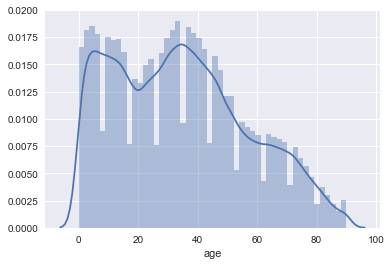

In [10]:
sns.distplot(df_train.age)

Age ranges from 0 to 90.

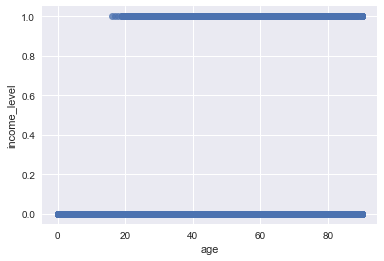

In [11]:
sns.regplot(x='age',y='income_level',data=df_train,fit_reg=False)

We can see that most of people under 20 belong to income_level 0, this means that we could bin this variable.

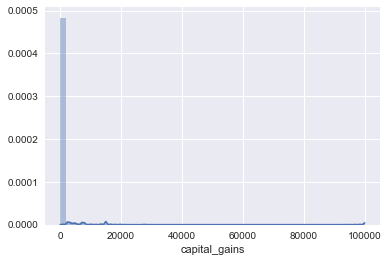

In [12]:
sns.distplot(df_train.capital_gains)

Capital gains has a very skewed distribution.

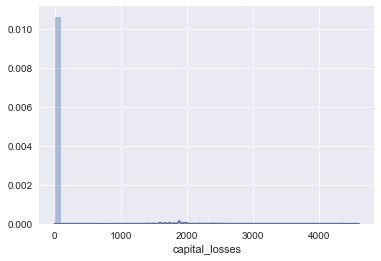

In [13]:
sns.distplot(df_train.capital_losses)

Capital losses has a very skewed distribution as well.

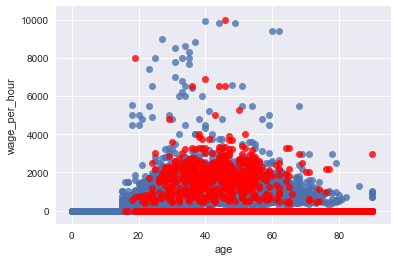

In [14]:
sns.regplot(x='age',y='wage_per_hour',data=df_train[df_train.income_level==0],fit_reg=False)
sns.regplot(x='age',y='wage_per_hour',data=df_train[df_train.income_level==1], color='red',fit_reg=False)

We can see that most of income_level 1 is between 20 and 65 years.

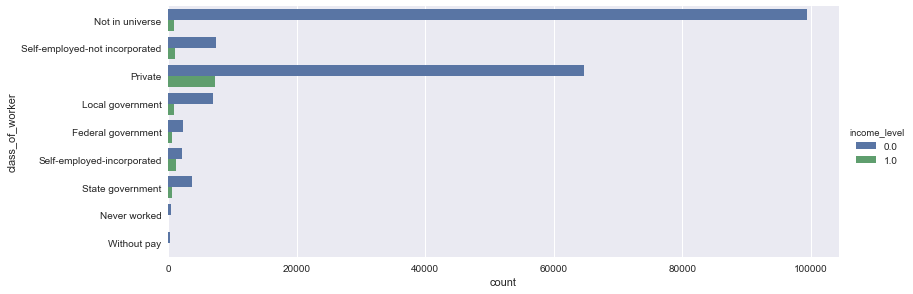

In [15]:
sns.factorplot(y='class_of_worker',kind='count',data=df_train,aspect=3,hue='income_level')

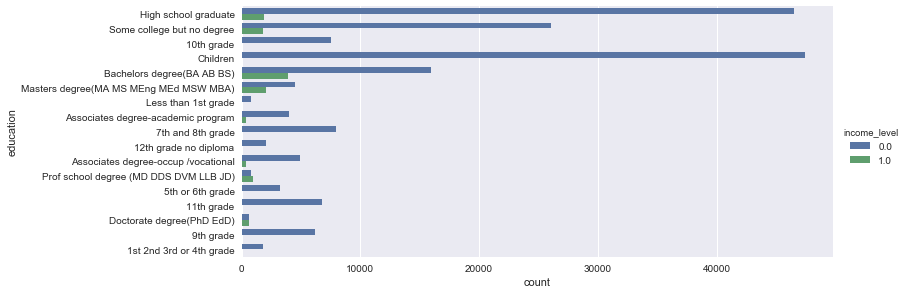

In [16]:
sns.factorplot(y='education',kind='count',data=df_train,aspect=3,hue='income_level')

Here we can see that all Children have income level 0 and that Bachelors degree and Masters degree accont for the majority of income level 1.

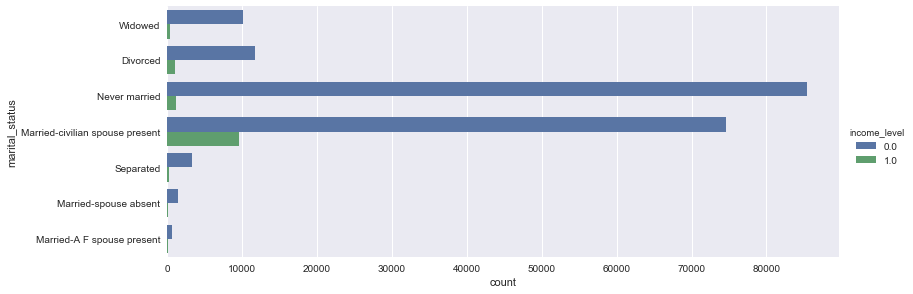

In [17]:
sns.factorplot(y='marital_status',kind='count',data=df_train,aspect=3,hue='income_level')

In terms of marital status, we can see that most of income_level 1 is associated to Married-civilian spouse present status.

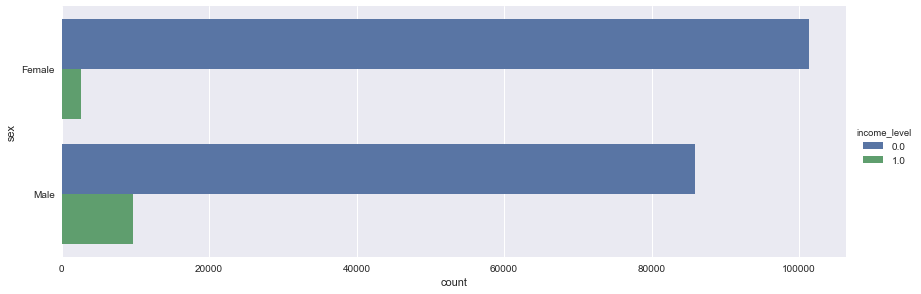

In [18]:
sns.factorplot(y='sex',kind='count',data=df_train,aspect=3,hue='income_level')

Males are more likely to belong to the income_level 1 class.

# 2. Data Cleaning

First, we will change to text some categorical variables that are stored as numerical:

In [19]:
df_train.industry_code=df_train.industry_code.astype(str)
df_train.occupation_code=df_train.occupation_code.astype(str)
df_train.business_or_self_employed=df_train.business_or_self_employed.astype(str)
df_train.veterans_benefits=df_train.veterans_benefits.astype(str)
df_train.year=df_train.year.astype(str)

In [20]:
df_test.industry_code=df_test.industry_code.astype(str)
df_test.occupation_code=df_test.occupation_code.astype(str)
df_test.business_or_self_employed=df_test.business_or_self_employed.astype(str)
df_test.veterans_benefits=df_test.veterans_benefits.astype(str)
df_test.year=df_test.year.astype(str)

Check the numerical variables and correlations:

In [21]:
num_vars=['age','wage_per_hour','capital_gains','capital_losses','dividend_from_Stocks',
         'num_person_Worked_employer','weeks_worked_in_year']

In [22]:
cor=df_train[num_vars].corr().stack()
cor[cor<>1].nlargest(10)[::2]
cor[cor<>1].nsmallest(10)[::2]

num_person_Worked_employer  weeks_worked_in_year          0.747302
age                         weeks_worked_in_year          0.206181
wage_per_hour               weeks_worked_in_year          0.195687
                            num_person_Worked_employer    0.191543
age                         num_person_Worked_employer    0.140887
dtype: float64

capital_gains         capital_losses               -0.012700
wage_per_hour         dividend_from_Stocks         -0.005731
                      capital_gains                -0.001082
dividend_from_Stocks  num_person_Worked_employer    0.007206
wage_per_hour         capital_losses                0.010993
dtype: float64

Looking at the correlations, we can see that weeks_worked_in_year is highly correlated with num_person_Worked_employer, so we will remove this variable.

In [23]:
df_train=df_train.drop(['weeks_worked_in_year'],axis=1)
df_test=df_test.drop(['weeks_worked_in_year'],axis=1)

Now let's check the null values in the categorical variables. First we will get the list of all categorical variables:

In [24]:
cat_vars=[]
for col in df_train.columns.tolist():

    if df_train[col].dtypes=='O':
        
        cat_vars.append(col)

cat_vars

['class_of_worker',
 'industry_code',
 'occupation_code',
 'education',
 'enrolled_in_edu_inst_lastwk',
 'marital_status',
 'major_industry_code',
 'major_occupation_code',
 'race',
 'hispanic_origin',
 'sex',
 'member_of_labor_union',
 'reason_for_unemployment',
 'full_parttime_employment_stat',
 'tax_filer_status',
 'region_of_previous_residence',
 'state_of_previous_residence',
 'd_household_family_stat',
 'd_household_summary',
 'migration_msa',
 'migration_reg',
 'migration_within_reg',
 'live_1_year_ago',
 'migration_sunbelt',
 'family_members_under_18',
 'country_father',
 'country_mother',
 'country_self',
 'citizenship',
 'business_or_self_employed',
 'fill_questionnaire_veteran_admin',
 'veterans_benefits',
 'year']

Now we will check the nulls:

In [25]:
nulls={}
for feat in cat_vars:
    nulls[feat]=(df_train[feat].isnull().sum()*1.0/len(df_train[feat]))*100
    
nulls

{'business_or_self_employed': 0.0,
 'citizenship': 0.0,
 'class_of_worker': 0.0,
 'country_father': 3.3645243906717517,
 'country_mother': 3.0668143522300686,
 'country_self': 1.7005558256441615,
 'd_household_family_stat': 0.0,
 'd_household_summary': 0.0,
 'education': 0.0,
 'enrolled_in_edu_inst_lastwk': 0.0,
 'family_members_under_18': 0.0,
 'fill_questionnaire_veteran_admin': 0.0,
 'full_parttime_employment_stat': 0.0,
 'hispanic_origin': 0.43804473669702243,
 'industry_code': 0.0,
 'live_1_year_ago': 0.0,
 'major_industry_code': 0.0,
 'major_occupation_code': 0.0,
 'marital_status': 0.0,
 'member_of_labor_union': 0.0,
 'migration_msa': 49.967171704515266,
 'migration_reg': 49.967171704515266,
 'migration_sunbelt': 49.967171704515266,
 'migration_within_reg': 49.967171704515266,
 'occupation_code': 0.0,
 'race': 0.0,
 'reason_for_unemployment': 0.0,
 'region_of_previous_residence': 0.0,
 'sex': 0.0,
 'state_of_previous_residence': 0.35484630844564286,
 'tax_filer_status': 0.0,
 'v

we can see that the variables migration_msa, migration_reg, migration_sunbelt and migration_within_reg have almost 50% of null values. Now we will keep just those variables that have less than 5% of missing values:

In [26]:
keep_cat = []

for cat_var in nulls:
    if nulls[cat_var]<5:
        keep_cat.append(cat_var)

keep_cat

['citizenship',
 'sex',
 'full_parttime_employment_stat',
 'year',
 'education',
 'enrolled_in_edu_inst_lastwk',
 'live_1_year_ago',
 'd_household_summary',
 'occupation_code',
 'industry_code',
 'country_mother',
 'member_of_labor_union',
 'major_industry_code',
 'hispanic_origin',
 'veterans_benefits',
 'reason_for_unemployment',
 'tax_filer_status',
 'country_self',
 'country_father',
 'marital_status',
 'd_household_family_stat',
 'major_occupation_code',
 'class_of_worker',
 'race',
 'fill_questionnaire_veteran_admin',
 'business_or_self_employed',
 'region_of_previous_residence',
 'family_members_under_18',
 'state_of_previous_residence']

In [27]:
keep=num_vars+keep_cat+['income_level']
keep.remove('weeks_worked_in_year')
keep

['age',
 'wage_per_hour',
 'capital_gains',
 'capital_losses',
 'dividend_from_Stocks',
 'num_person_Worked_employer',
 'citizenship',
 'sex',
 'full_parttime_employment_stat',
 'year',
 'education',
 'enrolled_in_edu_inst_lastwk',
 'live_1_year_ago',
 'd_household_summary',
 'occupation_code',
 'industry_code',
 'country_mother',
 'member_of_labor_union',
 'major_industry_code',
 'hispanic_origin',
 'veterans_benefits',
 'reason_for_unemployment',
 'tax_filer_status',
 'country_self',
 'country_father',
 'marital_status',
 'd_household_family_stat',
 'major_occupation_code',
 'class_of_worker',
 'race',
 'fill_questionnaire_veteran_admin',
 'business_or_self_employed',
 'region_of_previous_residence',
 'family_members_under_18',
 'state_of_previous_residence',
 'income_level']

In [28]:
df_train=df_train[keep]
df_test=df_test[keep]

We will check the rest of the categorical variables with missing values to replace them with the text 'no data':

In [29]:
# This function returns a dictionary with the percentage of nulls for each column
# of data frame

def get_nulls(dataframe, columns):
    nulls={}
    for feat in columns:
        nulls[feat]=(dataframe[feat].isnull().sum()*1.0/len(dataframe[feat]))*100
    
    return nulls

In [30]:
null_dict=get_nulls(df_train,df_train.columns.tolist())

for col in null_dict:
    
     if null_dict[col]>0:
            
            df_train[col]=df_train[col].fillna(value='no data')

get_nulls(df_train,df_train.columns.tolist())

{'age': 0.0,
 'business_or_self_employed': 0.0,
 'capital_gains': 0.0,
 'capital_losses': 0.0,
 'citizenship': 0.0,
 'class_of_worker': 0.0,
 'country_father': 0.0,
 'country_mother': 0.0,
 'country_self': 0.0,
 'd_household_family_stat': 0.0,
 'd_household_summary': 0.0,
 'dividend_from_Stocks': 0.0,
 'education': 0.0,
 'enrolled_in_edu_inst_lastwk': 0.0,
 'family_members_under_18': 0.0,
 'fill_questionnaire_veteran_admin': 0.0,
 'full_parttime_employment_stat': 0.0,
 'hispanic_origin': 0.0,
 'income_level': 0.0,
 'industry_code': 0.0,
 'live_1_year_ago': 0.0,
 'major_industry_code': 0.0,
 'major_occupation_code': 0.0,
 'marital_status': 0.0,
 'member_of_labor_union': 0.0,
 'num_person_Worked_employer': 0.0,
 'occupation_code': 0.0,
 'race': 0.0,
 'reason_for_unemployment': 0.0,
 'region_of_previous_residence': 0.0,
 'sex': 0.0,
 'state_of_previous_residence': 0.0,
 'tax_filer_status': 0.0,
 'veterans_benefits': 0.0,
 'wage_per_hour': 0.0,
 'year': 0.0}

In [31]:
null_dict=get_nulls(df_test,df_test.columns.tolist())

for col in null_dict:
    
     if null_dict[col]>0:
            
            df_test[col]=df_test[col].fillna(value='no data')

get_nulls(df_test,df_test.columns.tolist())

{'age': 0.0,
 'business_or_self_employed': 0.0,
 'capital_gains': 0.0,
 'capital_losses': 0.0,
 'citizenship': 0.0,
 'class_of_worker': 0.0,
 'country_father': 0.0,
 'country_mother': 0.0,
 'country_self': 0.0,
 'd_household_family_stat': 0.0,
 'd_household_summary': 0.0,
 'dividend_from_Stocks': 0.0,
 'education': 0.0,
 'enrolled_in_edu_inst_lastwk': 0.0,
 'family_members_under_18': 0.0,
 'fill_questionnaire_veteran_admin': 0.0,
 'full_parttime_employment_stat': 0.0,
 'hispanic_origin': 0.0,
 'income_level': 0.0,
 'industry_code': 0.0,
 'live_1_year_ago': 0.0,
 'major_industry_code': 0.0,
 'major_occupation_code': 0.0,
 'marital_status': 0.0,
 'member_of_labor_union': 0.0,
 'num_person_Worked_employer': 0.0,
 'occupation_code': 0.0,
 'race': 0.0,
 'reason_for_unemployment': 0.0,
 'region_of_previous_residence': 0.0,
 'sex': 0.0,
 'state_of_previous_residence': 0.0,
 'tax_filer_status': 0.0,
 'veterans_benefits': 0.0,
 'wage_per_hour': 0.0,
 'year': 0.0}

# 3. Preparing data for classification

We will check the frequencies of the classes of each categorical variables to see if we can group those with frequencies less than 5%:

In [32]:
# This function looks into the categorical columms of a data frame and change
# the categories with a frequency less than 5% to 'other'

def group_categories(dataframe, columns):
    
    for col in columns:
        
        for category in dataframe[col].unique():

            if (dataframe[col].value_counts()/len(dataframe[col])*100)[category]<2:
                dataframe[col][dataframe[col]==category]='other'
                
    return dataframe

In [33]:
df_train_new=group_categories(df_train, keep_cat)

In [34]:
df_test_new=group_categories(df_test, keep_cat)

Some categorical variables have categories with a space at the beginning or the end of the text:

In [35]:
df_test_new['citizenship'].value_counts().index

Index([u' Native- Born in the United States',
       u' Foreign born- Not a citizen of U S ',
       u' Foreign born- U S citizen by naturalization', u'other'],
      dtype='object')

We will fix that removing those spaces from the test set:

In [36]:
for col in keep_cat:
    df_test_new[col]=df_test_new[col].apply(lambda x: x.lstrip())
    df_test_new[col]=df_test_new[col].apply(lambda x: x.rstrip())

There are also two variables, country_mother and country_father with "?" values:

In [37]:
df_test_new.country_mother.value_counts()
df_test_new.country_father.value_counts()

United-States    80013
other            11690
Mexico            4987
?                 3072
Name: country_mother, dtype: int64

United-States    79368
other            11917
Mexico            5048
?                 3429
Name: country_father, dtype: int64

We will replace this values with the label "no data":

In [38]:
df_test_new.country_mother[df_test_new.country_mother=='?']='no data' 
df_test_new.country_mother.value_counts()

df_test_new.country_father[df_test_new.country_father=='?']='no data'
df_test_new.country_father.value_counts()

United-States    80013
other            11690
Mexico            4987
no data           3072
Name: country_mother, dtype: int64

United-States    79368
other            11917
Mexico            5048
no data           3429
Name: country_father, dtype: int64

We will check the classes for the train and test set:

In [39]:
for col in keep_cat:
    
    print (df_train_new[col].value_counts()*1.0/len(df_train_new[col]))*100

Native- Born in the United States              88.707568
Foreign born- Not a citizen of U S              6.716519
Foreign born- U S citizen by naturalization     2.934499
other                                           1.641415
Name: citizenship, dtype: float64
Female    52.116297
Male      47.883703
Name: sex, dtype: float64
Children or Armed Forces    62.032447
Full-time schedules         20.416694
Not in labor force          13.436045
other                        4.114814
Name: full_parttime_employment_stat, dtype: float64
94    50.032828
95    49.967172
Name: year, dtype: float64
High school graduate                      24.261363
Children                                  23.767686
Some college but no degree                13.943255
Bachelors degree(BA AB BS)                 9.956246
other                                      5.551741
7th and 8th grade                          4.013071
10th grade                                 3.787533
11th grade                                 3.

In [40]:
for col in keep_cat:
    
    print (df_test_new[col].value_counts()*1.0/len(df_test_new[col]))*100

Native- Born in the United States              88.565787
Foreign born- Not a citizen of U S              6.721998
Foreign born- U S citizen by naturalization     3.019186
other                                           1.693029
Name: citizenship, dtype: float64
Female    51.914557
Male      48.085443
Name: sex, dtype: float64
Children or Armed Forces    61.837172
Full-time schedules         20.515828
Not in labor force          13.444999
other                        4.202001
Name: full_parttime_employment_stat, dtype: float64
95    50.065155
94    49.934845
Name: year, dtype: float64
High school graduate                      24.204607
Children                                  23.497925
Some college but no degree                13.987290
Bachelors degree(BA AB BS)                 9.908582
other                                      5.682524
7th and 8th grade                          4.158898
10th grade                                 3.822097
11th grade                                 3.

Categories are now good to work with them. Now, we will check if it is possible to bin the numerical values:

In [41]:
df_train_new.age.value_counts().sort_values(ascending=False)[0]
df_train_new.wage_per_hour.value_counts()[0]
df_train_new.capital_gains.value_counts()[0]
df_train_new.capital_losses.value_counts()[0]
df_train_new.dividend_from_Stocks.value_counts()[0]
df_train_new.num_person_Worked_employer.value_counts()[0]

2839

188219

192144

195617

178382

95983

We can see that wage_per_hour, capital_gains, capital_losses and dividend_from_Stocks have large amount of zero values, so we will transform them in dummies taking the value of 0 if the variable's value is zero and 1 if the variable's value is grater than zero. Also we will create the variable age_bin to bin the variable age from 0-30, 31-60, 61-90.

In [42]:
df_train_new['age_bin']= pd.cut(df_train_new.age, [0,30,60,90],labels=['young','adult','old'])
df_test_new['age_bin']= pd.cut(df_test_new.age, [0,30,60,90],labels=['young','adult','old'])

In [43]:
df_train_new[['age','age_bin']].head(3)

,age,age_bin
0,73,old
1,58,adult
2,18,young


In [44]:
df_train_new['wage_per_hour_d']=(df_train_new.wage_per_hour!=0)*1.0
df_train_new['capital_gains_d']=(df_train_new.capital_gains!=0)*1.0
df_train_new['capital_losses_d']=(df_train_new.capital_losses!=0)*1.0
df_train_new['dividend_from_Stocks_d']=(df_train_new.dividend_from_Stocks!=0)*1.0

In [45]:
df_train_new[['wage_per_hour','wage_per_hour_d']].head(6)

,wage_per_hour,wage_per_hour_d
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,1200,1.0


In [46]:
df_test_new['wage_per_hour_d']=(df_test_new.wage_per_hour!=0)*1.0
df_test_new['capital_gains_d']=(df_test_new.capital_gains!=0)*1.0
df_test_new['capital_losses_d']=(df_test_new.capital_losses!=0)*1.0
df_test_new['dividend_from_Stocks_d']=(df_test_new.dividend_from_Stocks!=0)*1.0

In [47]:
df_test_new[['wage_per_hour','wage_per_hour_d']].head(6)

,wage_per_hour,wage_per_hour_d
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0


Now we will create final dataframe. Fisrt, we will remove the variables age, wage_per_hor, capital_gains, capital_losses and dividend_from_Stocks and keep the dummies we created before.

In [48]:
df_train_final=df_train_new.drop(['age','wage_per_hour','capital_gains','capital_losses',
                                'dividend_from_Stocks'],axis=1)
df_test_final=df_test_new.drop(['age','wage_per_hour','capital_gains','capital_losses',
                                'dividend_from_Stocks'],axis=1)

In [49]:
df_train_final.head(3)
df_test_final.head(3)

,num_person_Worked_employer,citizenship,sex,full_parttime_employment_stat,year,education,enrolled_in_edu_inst_lastwk,live_1_year_ago,d_household_summary,occupation_code,...,business_or_self_employed,region_of_previous_residence,family_members_under_18,state_of_previous_residence,income_level,age_bin,wage_per_hour_d,capital_gains_d,capital_losses_d,dividend_from_Stocks_d
0,0,Native- Born in the United States,Female,Not in labor force,95,High school graduate,Not in universe,Not in universe under 1 year old,Other relative of householder,0,...,0,Not in universe,Not in universe,Not in universe,0.0,old,0.0,0.0,0.0,0.0
1,1,Native- Born in the United States,Male,Children or Armed Forces,94,Some college but no degree,Not in universe,No,Householder,34,...,0,South,Not in universe,other,0.0,adult,0.0,0.0,0.0,0.0
2,0,Foreign born- Not a citizen of U S,Female,Not in labor force,95,10th grade,High school,Not in universe under 1 year old,Child 18 or older,0,...,0,Not in universe,Not in universe,Not in universe,0.0,young,0.0,0.0,0.0,0.0


,num_person_Worked_employer,citizenship,sex,full_parttime_employment_stat,year,education,enrolled_in_edu_inst_lastwk,live_1_year_ago,d_household_summary,occupation_code,...,business_or_self_employed,region_of_previous_residence,family_members_under_18,state_of_previous_residence,income_level,age_bin,wage_per_hour_d,capital_gains_d,capital_losses_d,dividend_from_Stocks_d
0,4,Foreign born- Not a citizen of U S,Female,Full-time schedules,95,other,Not in universe,Not in universe under 1 year old,Spouse of householder,36,...,0,Not in universe,Not in universe,Not in universe,0.0,adult,0.0,0.0,0.0,0.0
1,1,Native- Born in the United States,Female,other,95,Associates degree-occup /vocational,Not in universe,Not in universe under 1 year old,Spouse of householder,other,...,0,Not in universe,Not in universe,Not in universe,0.0,adult,0.0,0.0,0.0,1.0
2,0,Native- Born in the United States,Male,Children or Armed Forces,95,Children,Not in universe,Not in universe under 1 year old,Child under 18 never married,0,...,0,Not in universe,Both parents present,Not in universe,0.0,young,0.0,0.0,0.0,0.0


In [108]:
df_train_final.to_csv('df_train_final.csv')
df_test_final.to_csv('df_test_final.csv')

Now we need to transform the categorical variables into dummies. First we will get the list of binary variables:

In [50]:
binary=[]

for col in keep_cat:
    
    if len(df_train_final[col].value_counts())==2:
        binary.append(col)

binary  

['sex',
 'year',
 'reason_for_unemployment',
 'fill_questionnaire_veteran_admin',
 'state_of_previous_residence']

In [51]:
binary=[]

for col in keep_cat:
    
    if len(df_test_final[col].value_counts())==2:
        binary.append(col)

binary  

['sex',
 'year',
 'reason_for_unemployment',
 'fill_questionnaire_veteran_admin',
 'state_of_previous_residence']

Now we will crate dummies for all the binary variables:

In [52]:
for col in binary:
    
    df_train_final=pd.get_dummies(df_train_final,columns=[col],drop_first=True)

In [53]:
df_train_final.head(3)

,num_person_Worked_employer,citizenship,full_parttime_employment_stat,education,enrolled_in_edu_inst_lastwk,live_1_year_ago,d_household_summary,occupation_code,industry_code,country_mother,...,age_bin,wage_per_hour_d,capital_gains_d,capital_losses_d,dividend_from_Stocks_d,sex_Male,year_95,reason_for_unemployment_other,fill_questionnaire_veteran_admin_other,state_of_previous_residence_other
0,0,Native- Born in the United States,Not in labor force,High school graduate,Not in universe,Not in universe under 1 year old,Other relative of householder,0,0,United-States,...,old,0.0,0.0,0.0,0.0,0,1,0,0,0
1,1,Native- Born in the United States,Children or Armed Forces,Some college but no degree,Not in universe,No,Householder,34,4,United-States,...,adult,0.0,0.0,0.0,0.0,1,0,0,0,1
2,0,Foreign born- Not a citizen of U S,Not in labor force,10th grade,High school,Not in universe under 1 year old,Child 18 or older,0,0,other,...,young,0.0,0.0,0.0,0.0,0,1,0,0,0


In [54]:
for col in binary:
    
    df_test_final=pd.get_dummies(df_test_final,columns=[col],drop_first=True)

In [55]:
df_test_final.head(3)

,num_person_Worked_employer,citizenship,full_parttime_employment_stat,education,enrolled_in_edu_inst_lastwk,live_1_year_ago,d_household_summary,occupation_code,industry_code,country_mother,...,age_bin,wage_per_hour_d,capital_gains_d,capital_losses_d,dividend_from_Stocks_d,sex_Male,year_95,reason_for_unemployment_other,fill_questionnaire_veteran_admin_other,state_of_previous_residence_other
0,4,Foreign born- Not a citizen of U S,Full-time schedules,other,Not in universe,Not in universe under 1 year old,Spouse of householder,36,other,Mexico,...,adult,0.0,0.0,0.0,0.0,0,1,0,0,0
1,1,Native- Born in the United States,other,Associates degree-occup /vocational,Not in universe,Not in universe under 1 year old,Spouse of householder,other,37,United-States,...,adult,0.0,0.0,0.0,1.0,0,1,0,0,0
2,0,Native- Born in the United States,Children or Armed Forces,Children,Not in universe,Not in universe under 1 year old,Child under 18 never married,0,0,United-States,...,young,0.0,0.0,0.0,0.0,1,1,0,0,0


Now, we will create dummies for the rest of the categorical variables:

In [56]:
df_train_final=pd.get_dummies(df_train_final)
df_test_final=pd.get_dummies(df_test_final)

In [57]:
df_train_final.head(3)
df_test_final.head(3)

,num_person_Worked_employer,income_level,wage_per_hour_d,capital_gains_d,capital_losses_d,dividend_from_Stocks_d,sex_Male,year_95,reason_for_unemployment_other,fill_questionnaire_veteran_admin_other,...,region_of_previous_residence_South,region_of_previous_residence_West,region_of_previous_residence_other,family_members_under_18_Both parents present,family_members_under_18_Mother only present,family_members_under_18_Not in universe,family_members_under_18_other,age_bin_young,age_bin_adult,age_bin_old
0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


,num_person_Worked_employer,income_level,wage_per_hour_d,capital_gains_d,capital_losses_d,dividend_from_Stocks_d,sex_Male,year_95,reason_for_unemployment_other,fill_questionnaire_veteran_admin_other,...,region_of_previous_residence_South,region_of_previous_residence_West,region_of_previous_residence_other,family_members_under_18_Both parents present,family_members_under_18_Mother only present,family_members_under_18_Not in universe,family_members_under_18_other,age_bin_young,age_bin_adult,age_bin_old
0,4,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,1,0.0,0.0,0.0,0.0,1.0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [58]:
df_train_final.columns.tolist()


['num_person_Worked_employer',
 'income_level',
 'wage_per_hour_d',
 'capital_gains_d',
 'capital_losses_d',
 'dividend_from_Stocks_d',
 'sex_Male',
 'year_95',
 'reason_for_unemployment_other',
 'fill_questionnaire_veteran_admin_other',
 'state_of_previous_residence_other',
 'citizenship_Foreign born- Not a citizen of U S',
 'citizenship_Foreign born- U S citizen by naturalization',
 'citizenship_Native- Born in the United States',
 'citizenship_other',
 'full_parttime_employment_stat_Children or Armed Forces',
 'full_parttime_employment_stat_Full-time schedules',
 'full_parttime_employment_stat_Not in labor force',
 'full_parttime_employment_stat_other',
 'education_10th grade',
 'education_11th grade',
 'education_7th and 8th grade',
 'education_9th grade',
 'education_Associates degree-academic program',
 'education_Associates degree-occup /vocational',
 'education_Bachelors degree(BA AB BS)',
 'education_Children',
 'education_High school graduate',
 'education_Masters degree(MA M

In [59]:
df_test_final.columns.tolist()

['num_person_Worked_employer',
 'income_level',
 'wage_per_hour_d',
 'capital_gains_d',
 'capital_losses_d',
 'dividend_from_Stocks_d',
 'sex_Male',
 'year_95',
 'reason_for_unemployment_other',
 'fill_questionnaire_veteran_admin_other',
 'state_of_previous_residence_other',
 'citizenship_Foreign born- Not a citizen of U S',
 'citizenship_Foreign born- U S citizen by naturalization',
 'citizenship_Native- Born in the United States',
 'citizenship_other',
 'full_parttime_employment_stat_Children or Armed Forces',
 'full_parttime_employment_stat_Full-time schedules',
 'full_parttime_employment_stat_Not in labor force',
 'full_parttime_employment_stat_other',
 'education_10th grade',
 'education_11th grade',
 'education_7th and 8th grade',
 'education_9th grade',
 'education_Associates degree-academic program',
 'education_Associates degree-occup /vocational',
 'education_Bachelors degree(BA AB BS)',
 'education_Children',
 'education_High school graduate',
 'education_Masters degree(MA M

Finally, we will create the dataframe with the X variables:

In [60]:
df_train_final_X=df_train_final.drop(['income_level'],axis=1)
df_train_final_y=df_train_final.income_level

In [61]:
df_train_final_X=df_train_final_X.rename(columns={'d_household_family_stat_Child <18 never marr not in subfamily':
                                'd_household_family_stat_Child less18 never marr not in subfamily'})

In [62]:
df_test_final_X=df_test_final.drop(['income_level'],axis=1)
df_test_final_y=df_test_final.income_level

In [63]:
df_test_final_X=df_test_final_X.rename(columns={'d_household_family_stat_ Child <18 never marr not in subfamily':
                                                'd_household_family_stat_ Child less18 never marr not in subfamily'})

# 4. Classification

## 4.1 XGBoost

Now that we have processed our data, we will use the XGBoost classifier to try to predict the income level. We will look for the best parameters performing a Grid Search and then we will train our model using those paramaters.

In [64]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold


from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

C:\Users\prodi\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


First we will define the train features as X_train and the train labels as y_train. We will do the same for the test set:

In [65]:
X_train=df_train_final_X
y_train=df_train_final_y

In [66]:
X_test=df_test_final_X
y_test=df_test_final_y

There are some differences in the column names, so we will set the names in the test set equal to the names in the training set:

In [67]:
X_test.columns=X_train.columns.tolist()

In [68]:
X_test.describe()

,num_person_Worked_employer,wage_per_hour_d,capital_gains_d,capital_losses_d,dividend_from_Stocks_d,sex_Male,year_95,reason_for_unemployment_other,fill_questionnaire_veteran_admin_other,state_of_previous_residence_other,...,region_of_previous_residence_South,region_of_previous_residence_West,region_of_previous_residence_other,family_members_under_18_Both parents present,family_members_under_18_Mother only present,family_members_under_18_Not in universe,family_members_under_18_other,age_bin_young,age_bin_adult,age_bin_old
count,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,...,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000
mean,1.956156,0.055973,0.037309,0.019126,0.105531,0.480854,0.500652,0.031375,0.010295,0.077124,...,0.024308,0.020509,0.032307,0.194052,0.062719,0.725667,0.017562,0.442393,0.389477,0.153806
std,2.364331,0.229871,0.189518,0.136967,0.307238,0.499636,0.500002,0.174329,0.100939,0.266789,...,0.154004,0.141734,0.176815,0.395471,0.242459,0.446180,0.131353,0.496673,0.487634,0.360765
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Given that our data is imbalanced, we will perform a stratified cross validation of 5 folds:

In [69]:
kf = StratifiedKFold(n_splits=5,random_state=0,shuffle=True)

We will make a Grid Search to find the best parameters for the XGboost classifier:

In [70]:
gbm = xgb.XGBClassifier()

In [517]:
parameters=[{'n_estimators':[50,80,100],
                        'max_depth':[4,8],
                        'objective':["binary:logistic"],
                        'learning_rate':[0.5,1], 
                        'subsample':[.8],
                        'min_child_weight':[4,6],
                        'colsample_bytree':[.8],
                        'scale_pos_weight':[1.6],
                        'gamma':[0,10,100],
                        'reg_alpha':[0,8],
                        'reg_lambda':[0,1,1.3]}]

grid_search = GridSearchCV(estimator=gbm, param_grid=parameters, scoring='f1', cv=kf)

grid_search=grid_search.fit(X_train,y_train)

#best_f1=grid_search.best_score_
best_parameters=grid_search.best_params_

Let's see our parameters and the best F1 score:

In [528]:
best_sc=grid_search.best_score_
best_sc
best_parameters

0.5163988284677773

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.5,
 'max_depth': 4,
 'min_child_weight': 6,
 'n_estimators': 80,
 'objective': 'binary:logistic',
 'reg_alpha': 8,
 'reg_lambda': 1.3,
 'scale_pos_weight': 1.6,
 'subsample': 0.8}

Now we will train the XGBoost classifier with the best parameters that we found:

In [71]:
#best params using 'f1' score
params={'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.5,
 'max_depth': 4,
 'min_child_weight': 6,
 'n_estimators': 80,
 'objective': 'binary:logistic',
 'reg_alpha': 8,
 'reg_lambda': 1.3,
 'scale_pos_weight': 2,
 'subsample': 0.8}

#best params using 'roc_auc' score
#params={'colsample_bytree': 0.8,
# 'gamma': 0,
# 'learning_rate': 0.5,
# 'max_depth': 4,
# 'min_child_weight': 6,
# 'n_estimators': 80,
# 'objective': 'binary:logistic',
# 'reg_alpha': 8,
# 'reg_lambda': 1.3,
# 'scale_pos_weight': 1.6,
# 'subsample': 0.8}


#params={'colsample_bytree': 0.642,
#     'learning_rate': 0.161,  
#     'max_depth': 3,
#     'min_child_weight': 7.67,
#     'n_estimators': 80,
#     'objective': 'binary:logistic',
#     'reg_lambda': 0.221,
#     'subsample': 0.7}


#params=best_parameters

gbm_clf = xgb.XGBClassifier(**params)

In [72]:
gbm_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.5, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=80, nthread=-1,
       objective='binary:logistic', reg_alpha=8, reg_lambda=1.3,
       scale_pos_weight=2, seed=0, silent=True, subsample=0.8)

The next step is to get the predictions from our trained model. We will get the predictions as well as the probabilities:

In [73]:
y_pred=gbm_clf.predict(X_test)

C:\Users\prodi\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [74]:
y_probs=gbm_clf.predict_proba(X_test)[:, 1]
y_probs

array([0.00443813, 0.13832615, 0.00020825, ..., 0.04704167, 0.16951753,
       0.01392137], dtype=float32)

Based on the predictions, let's take a look at the confusion matrix, the auc_score and the F1 score:

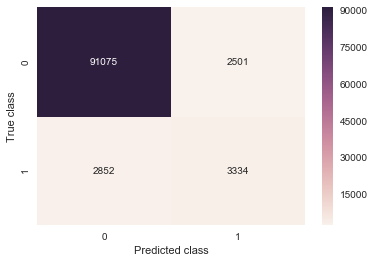

In [75]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt="d");
plt.ylabel('True class');
plt.xlabel('Predicted class');
plt.show();

#confusion_matrix(y_test, y_pred)

In [76]:
print "test accuracy score: " + str(accuracy_score(y_test, y_pred))
print "test auc score: " + str(roc_auc_score(y_test, y_pred))
print "test F1 score: " + str(f1_score(y_test, y_pred))
print "test Precision: " + str(precision_score(y_test, y_pred))
print "test Recall: " + str(recall_score(y_test, y_pred))

test accuracy score: 0.9463422946612938
test auc score: 0.7561160005048257
test F1 score: 0.554695948756343
test Precision: 0.5713796058269066
test Recall: 0.5389589395408988


As expected, given the unbalanced nature of our data, our classifier is showing a high accuracy of 94.63% but is not performing that good in terms of precision and recall, with a F1 score of 0.5547.

Now we will take a look to the ROC curve:

0.9417974952804571


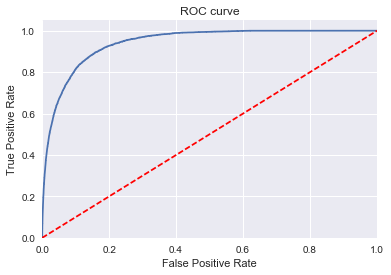

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_probs)
    roc_auc[i] = auc(fpr[i], tpr[i])

print roc_auc_score(y_test, y_probs)
plt.figure();
plt.plot(fpr[1], tpr[1]);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.plot([0,1],[0,1],'r--');
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve');
plt.show();

Again, as expected, we can see a high AUC score of 0.9418. In an imblanced data set, the False Positive rate does not drop significantly when the number of True Negative observations is huge, so we could expect high AUC scores even having low F1 scores.

Now we will look at the Precision-Recall curve:

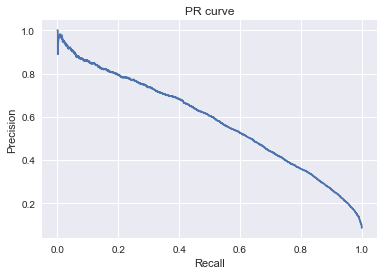

In [78]:
from sklearn.metrics import precision_recall_curve

p,r,_ = precision_recall_curve(y_test,y_probs)

plt.figure();
plt.plot(r, p);
plt.xlabel('Recall');
plt.ylabel('Precision');
plt.title('PR curve');
plt.show();

For a very good classifier We would expect to see the curve in the right-upper zone of the plot. In this case we can see that in our classifier as long as we improved recall we will loose precision, that is why the F1 best score is around 0.5. 

Now we will check the threshold that maximizes our F1 score:

In [79]:
f1=[]
f1probs=[]

for i in np.arange(0,1,0.01):
    
    y_pred_t=(y_probs>=i)*1
    f1probs.append(i)
    f1.append(f1_score(y_test, y_pred_t))
    


In [80]:
f1_probs=pd.DataFrame({'f1': array(f1),
                        'probs': array(f1probs)})

Threshold for max. F1 score: 0.44


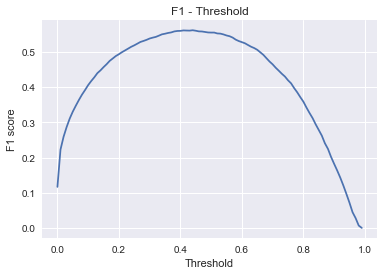

In [81]:
print 'Threshold for max. F1 score: ' +str(f1_probs[f1_probs.f1==f1_probs.f1.max()].probs.values[0])

plt.figure();
plt.plot(f1_probs.probs, f1_probs.f1);
plt.xlabel('Threshold');
plt.ylabel('F1 score');
plt.title('F1 - Threshold');
plt.show();

It is possible to see that with a threshold of 0.44 we can maximize or F1 score, so we will use that value to make our predictions:

In [82]:
y_pred2=(y_probs>0.44)*1

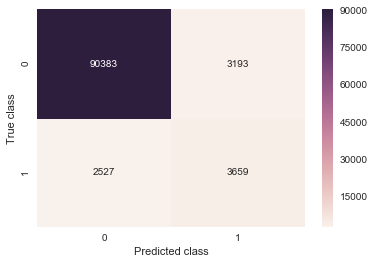

test accuracy score: 0.9426635392233516
test auc score: 0.7786874657275316
test F1 score: 0.5612824052768829
test Precision: 0.5340046701692936
test Recall: 0.5914969285483349


In [83]:
sns.heatmap(confusion_matrix(y_test, y_pred2),annot=True, fmt="d");
plt.ylabel('True class');
plt.xlabel('Predicted class');
plt.show();

#confusion_matrix(y_test, y_pred2)
print "test accuracy score: " + str(accuracy_score(y_test, y_pred2))
print "test auc score: " + str(roc_auc_score(y_test, y_pred2))
print "test F1 score: " + str(f1_score(y_test, y_pred2))
print "test Precision: " + str(precision_score(y_test, y_pred2))
print "test Recall: " + str(recall_score(y_test, y_pred2))

We can see that our predictions improved using the threshold of 0.44. Our F1 score went from 0.5547 to 0.5612.

## 4.2 Light GBM

We will try a LightGBM classifier:

In [84]:
import lightgbm as lgb

In [86]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    #'is_unbalance': 'true',
    'scale_pos_weight': 1.6,
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0,
    'max_depth': 3
}




data=X_train
label=y_train
#categorical_features=['citizenship','sex', 'full_parttime_employment_stat', 'year',                               
#'education', 'enrolled_in_edu_inst_lastwk', 'live_1_year_ago', 'd_household_summary',                 
#'occupation_code', 'industry_code', 'country_mother',  'member_of_labor_union',               
#'major_industry_code', 'hispanic_origin', 'veterans_benefits', 'reason_for_unemployment',             
#'tax_filer_status','country_self', 'country_father','marital_status','d_household_family_stat',             
#'major_occupation_code','class_of_worker', 'race', 'fill_questionnaire_veteran_admin',
#'business_or_self_employed','region_of_previous_residence','family_members_under_18',
#'state_of_previous_residence','age_bin']

train_data = lgb.Dataset(data, label=label)#, categorical_feature=categorical_features)
test_data = lgb.Dataset(X_test, label=y_test)


trained_model = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's auc: 0.833214
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.880928
[3]	valid_0's auc: 0.897339
[4]	valid_0's auc: 0.906465
[5]	valid_0's auc: 0.905539
[6]	valid_0's auc: 0.913824
[7]	valid_0's auc: 0.912951
[8]	valid_0's auc: 0.91562
[9]	valid_0's auc: 0.915867
[10]	valid_0's auc: 0.915245
[11]	valid_0's auc: 0.91551
[12]	valid_0's auc: 0.914683
[13]	valid_0's auc: 0.91586
[14]	valid_0's auc: 0.915955
[15]	valid_0's auc: 0.915506
[16]	valid_0's auc: 0.915471
[17]	valid_0's auc: 0.915859
[18]	valid_0's auc: 0.91596
[19]	valid_0's auc: 0.916506
[20]	valid_0's auc: 0.916755
[21]	valid_0's auc: 0.916795
[22]	valid_0's auc: 0.916625
[23]	valid_0's auc: 0.916987
[24]	valid_0's auc: 0.917333
[25]	valid_0's auc: 0.917331
[26]	valid_0's auc: 0.917509
[27]	valid_0's auc: 0.918029
[28]	valid_0's auc: 0.918397
[29]	valid_0's auc: 0.918414
[30]	valid_0's auc: 0.918758
[31]	valid_0's auc: 0.918478
[32]	valid_0's auc: 0.918687
[33]	valid_0's auc: 0.

In [87]:
y_prob_lgb=trained_model.predict(X_test)

Let's take a look at the predictions:

In [88]:
threshold=0.5
y_pred_lgb=(y_prob_lgb>threshold)*1.0

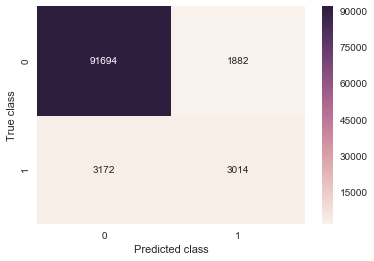

test accuracy score: 0.9493394278382551
test auc score: 0.7335586163794559
test F1 score: 0.5439451362569934
test Precision: 0.6156045751633987
test Recall: 0.48722922728742324


In [95]:
sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, fmt="d");
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
#confusion_matrix(y_test, y_pred_f_ups)

print "test accuracy score: " + str(accuracy_score(y_test, y_pred_lgb))
print "test auc score: " + str(roc_auc_score(y_test, y_pred_lgb))
print "test F1 score: " + str(f1_score(y_test, y_pred_lgb))
print "test Precision: " + str(precision_score(y_test, y_pred_lgb))
print "test Recall: " + str(recall_score(y_test, y_pred_lgb))

Without optimizing the threshold we are getting a F1 score of 0.5439. Now we will find the best threshold:

Threshold for max. F1 score: 0.4


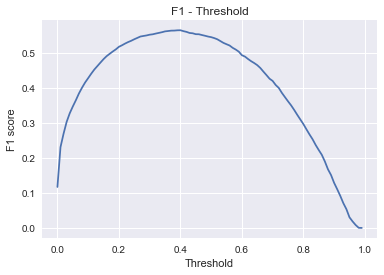

In [90]:
f1_l=[]
f1probs_l=[]

for i in np.arange(0,1,0.01):
    
    y_pred_t_l=(y_prob_lgb>=i)*1
    f1probs_l.append(i)
    f1_l.append(f1_score(y_test, y_pred_t_l))
    
f1_probs_l=pd.DataFrame({'f1': array(f1_l),
                        'probs': array(f1probs_l)})

print 'Threshold for max. F1 score: ' +str(f1_probs_l[f1_probs_l.f1==f1_probs_l.f1.max()].probs.values[0])

plt.figure();
plt.plot(f1_probs_l.probs, f1_probs_l.f1);
plt.xlabel('Threshold');
plt.ylabel('F1 score');
plt.title('F1 - Threshold');
plt.show();

A threshold of 0.4 maximizes the F1 score, so we will predict using that value:

In [91]:
threshold=0.4
y_pred_lgb2=(y_prob_lgb>threshold)*1.0

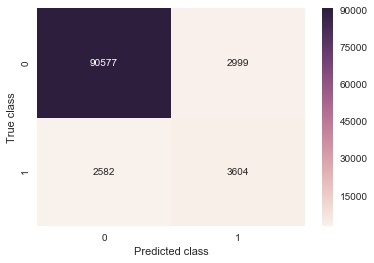

test accuracy score: 0.9440568553156512
test auc score: 0.7752785341595294
test F1 score: 0.5636093517866917
test Precision: 0.5458125094653945
test Recall: 0.5826058842547688


In [94]:
sns.heatmap(confusion_matrix(y_test, y_pred_lgb2), annot=True, fmt="d");
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
#confusion_matrix(y_test, y_pred_f_ups)

print "test accuracy score: " + str(accuracy_score(y_test, y_pred_lgb2))
print "test auc score: " + str(roc_auc_score(y_test, y_pred_lgb2))
print "test F1 score: " + str(f1_score(y_test, y_pred_lgb2))
print "test Precision: " + str(precision_score(y_test, y_pred_lgb2))
print "test Recall: " + str(recall_score(y_test, y_pred_lgb2))

We can see a F1 score of 0.5636, a slightly better result compared to the F1 score of 0.5612 obtained with XGBoost. Now let's check the ROC curve:

0.9422341898247596


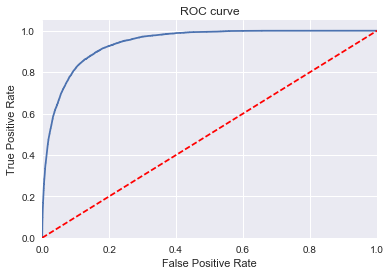

In [96]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob_lgb)
    roc_auc[i] = auc(fpr[i], tpr[i])

print roc_auc_score(y_test, y_prob_lgb)
plt.figure();
plt.plot(fpr[1], tpr[1]);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.plot([0,1],[0,1],'r--');
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve');
plt.show();

Finally, let's see what are the most important features used by our classifier to classify the income class:

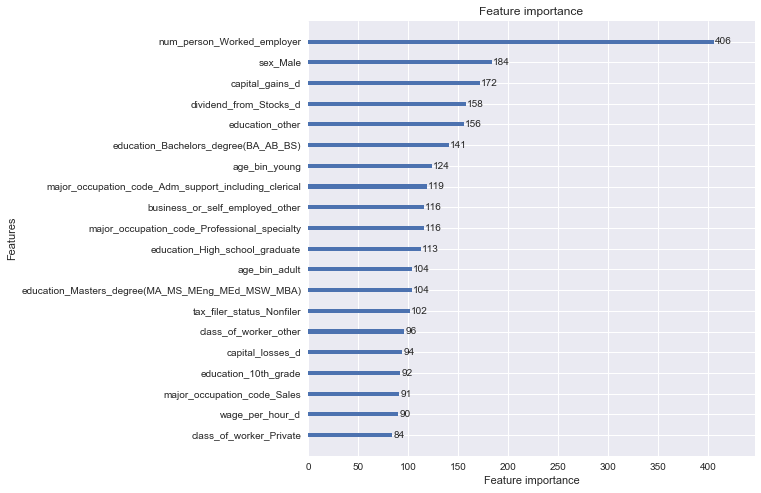

In [109]:
ax = lgb.plot_importance(trained_model, max_num_features=20)
fig=ax.figure
fig.set_size_inches(8, 8)

# Conclusion

If we consider as a benchmark Kohavi's paper: "Scaling Up The Accuracy of Naive-Bayes Classifier: A Decission-Tree Hybrid" (http://robotics.stanford.edu/~ronnyk/nbtree.pdf), where a Naive-Bayes and C4.5 classifiers were used on this dataset achieving an accuracy of 83.5% and 85.5% respectively, we could say that obtaining an accuracy of 94.4% using the LightGBM classifier is a good result.